# IPND Stage 5 Final Project

###### Created by Wonseok, Choi
###### Version : Python 3
* Dataset : Titanic Data
* Question : What factors affect the Fare?

Let's see how the 'Titanic Data' looks like

In [1]:
# Import some useful libraries
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Read Titanic Data as Pandas
filename = './datasets/ud170/titanic/titanic_data.csv'
titanic_df = pd.read_csv(filename)

# See head of data
titanic_df.head()

Populating the interactive namespace from numpy and matplotlib


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Firstly, I see a lot of NaN values. So cleaning the missing value is necessary.

In [2]:
# Use built-in function 'dropna()'
titanic_df = titanic_df.dropna()

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


Let's check the correlation between Fare and others

In [3]:
# Define Correlation Function
def correlation(x, y):
    std_x = (x - x.mean()) / x.std(ddof=0)
    std_y = (y - y.mean()) / y.std(ddof=0)
    
    correlation = (std_x * std_y).mean()
    return correlation
print ("Correlation between Fare and Survived: {}".format(correlation(titanic_df['Fare'],
                                                                      titanic_df['Survived'])))
print ("Correlation between Fare and Pclass: {}".format(correlation(titanic_df['Fare'],
                                                                    titanic_df['Pclass'])))
print ("Correlation between Fare and Age: {}".format(correlation(titanic_df['Fare'],
                                                                 titanic_df['Age'])))
print ("Correlation between Fare and SibSp: {}".format(correlation(titanic_df['Fare'],
                                                                   titanic_df['SibSp'])))
print ("Correlation between Fare and Parch: {}".format(correlation(titanic_df['Fare'],
                                                                   titanic_df['Parch'])))
print ("\n... Above can be easily obtained by ...\n")
# Easily obtained from built-in function
titanic_df.corr()['Fare']

Correlation between Fare and Survived: 0.13424105283521096
Correlation between Fare and Pclass: -0.31523537560704196
Correlation between Fare and Age: -0.09242385620999945
Correlation between Fare and SibSp: 0.2864329595511936
Correlation between Fare and Parch: 0.3897395036758494

... Above can be easily obtained by ...



PassengerId    0.029740
Survived       0.134241
Pclass        -0.315235
Age           -0.092424
SibSp          0.286433
Parch          0.389740
Fare           1.000000
Name: Fare, dtype: float64

Since I can not check the non-integer values, let's check it.

In [4]:
# Check mean value of Sex group
titanic_df.groupby('Sex').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,461.818182,0.931818,1.215909,32.676136,0.534091,0.545455,89.000900
male,449.389474,0.431579,1.168421,38.451789,0.400000,0.410526,69.124343


In [5]:
# Check mean value of Embarked group
titanic_df.groupby('Embarked').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,444.046154,0.738462,1.030769,37.461538,0.415385,0.400000,103.342503
Q,329.500000,0.500000,1.000000,38.500000,1.500000,0.000000,90.000000
S,463.879310,0.637931,1.284483,34.624310,0.474138,0.525862,64.669216


It looks like that there exist some correlation between Fare and Sex, Embarked.
So, let's plot!

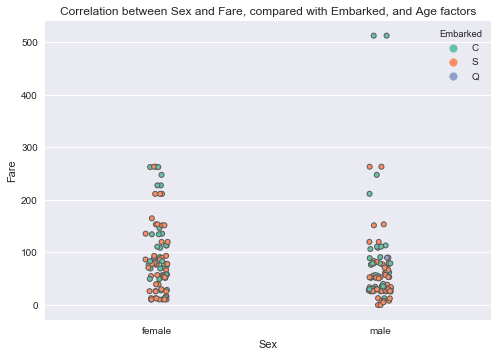

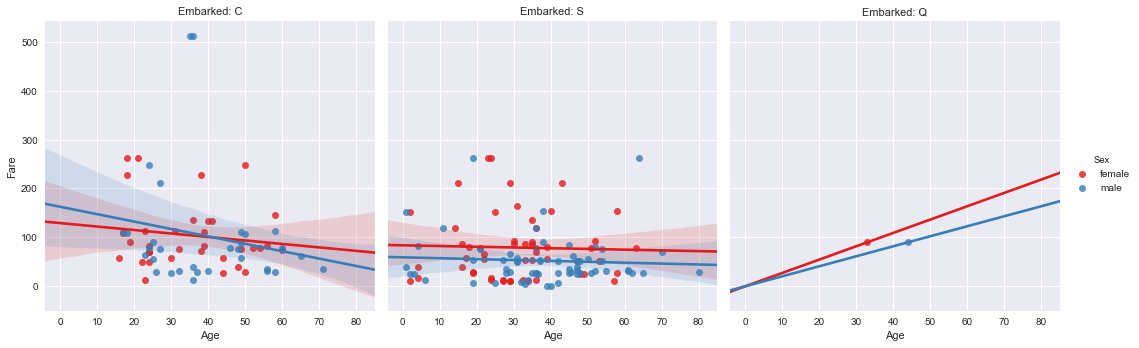

In [6]:
# Plot the correlation between Sex, Fare, Embarked, and Age
sns.stripplot(x='Sex', y='Fare', hue="Embarked", data=titanic_df, jitter=0.05, linewidth=1, palette="Set2").set_title('Correlation between Sex and Fare, compared with Embarked, and Age factors')
sns.lmplot(x="Age", y="Fare", hue="Sex", col="Embarked", data=titanic_df, palette="Set1").set_titles('Embarked: {col_name}')

One thing I found in the above plot is that the 'Cherbourg' port may expensive.
So Let me see more clearly!

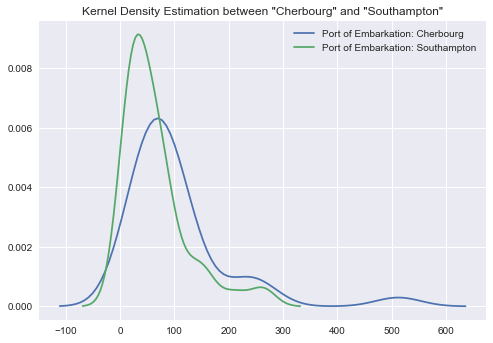

In [7]:
# Plot the kernel density estimation (KDE) to estimate the probability density function
sns.plt.title('Kernel Density Estimation between "Cherbourg" and "Southampton"')
sns.kdeplot(titanic_df[titanic_df['Embarked'] == 'C']['Fare'], label="Port of Embarkation: Cherbourg")
sns.kdeplot(titanic_df[titanic_df['Embarked'] == 'S']['Fare'], label="Port of Embarkation: Southampton")
plt.legend();

Apparently, the 'Cherbourg' port looks more expensive than the other port! 

So this could be a factor which affect the Fare!

Let's see another Factor: 'Pclass'

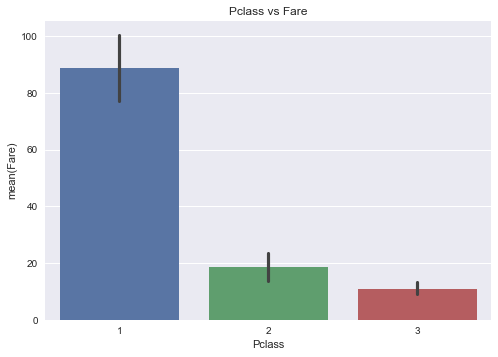

In [8]:
# Plot the comparison between Fare and Pclass
sns.plt.title('Pclass vs Fare')
sns.barplot(x="Pclass", y="Fare", data=titanic_df)

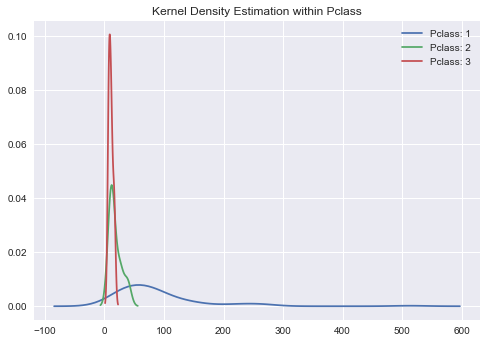

In [9]:
# Plot the kernel density estimation (KDE) to estimate the probability density of each Pclass
sns.plt.title('Kernel Density Estimation within Pclass')
sns.kdeplot(titanic_df[titanic_df['Pclass'] == 1]['Fare'], label="Pclass: 1")
sns.kdeplot(titanic_df[titanic_df['Pclass'] == 2]['Fare'], label="Pclass: 2")
sns.kdeplot(titanic_df[titanic_df['Pclass'] == 3]['Fare'], label="Pclass: 3")
plt.legend();

Obviously Pclass factor affect the Fare, too.

Also, 'first class' is the most expensive but has the largest standard deviation.

Next thing is the comparison between SibSp, and Parch

Average Fare of 0 Parch: 61.112843442622946
Average Fare of 1 Parch: 94.0596837837838
Average Fare of 2 Parch: 139.1268086956522
Average Fare of 4 Parch: 263.0


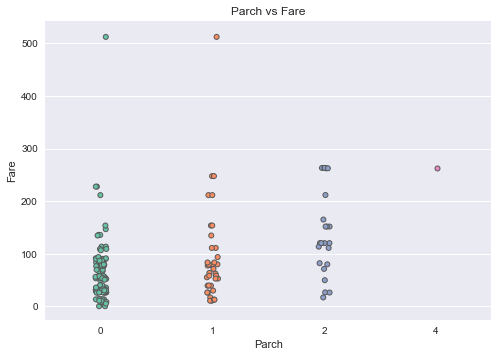

In [10]:
# Plot the correlation between Parch and Fare, and average Fare of each Parch
sns.plt.title('Parch vs Fare')
sns.stripplot(x='Parch', y='Fare', data=titanic_df, jitter=0.05, linewidth=1, palette="Set2")
print ("Average Fare of {} Parch: {}" .format(0, titanic_df.groupby('Parch').mean()['Fare'].iloc[0]))
print ("Average Fare of {} Parch: {}" .format(1, titanic_df.groupby('Parch').mean()['Fare'].iloc[1]))
print ("Average Fare of {} Parch: {}" .format(2, titanic_df.groupby('Parch').mean()['Fare'].iloc[2]))
print ("Average Fare of {} Parch: {}" .format(4, titanic_df.groupby('Parch').mean()['Fare'].iloc[3]))

Average Fare of 0 SibSp: 67.90283999999998
Average Fare of 1 SibSp: 84.31797187500004
Average Fare of 2 SibSp: 124.0382
Average Fare of 3 SibSp: 263.0


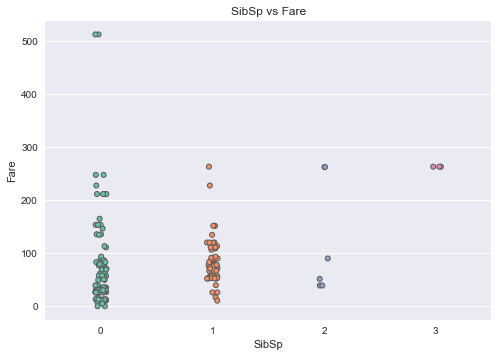

In [11]:
# Plot the correlation between SibSp and Fare, and average Fare of each SibSp
sns.plt.title('SibSp vs Fare')
sns.stripplot(x='SibSp', y='Fare', data=titanic_df, jitter=0.05, linewidth=1, palette="Set2")
print ("Average Fare of {} SibSp: {}" .format(0, titanic_df.groupby('SibSp').mean()['Fare'].iloc[0]))
print ("Average Fare of {} SibSp: {}" .format(1, titanic_df.groupby('SibSp').mean()['Fare'].iloc[1]))
print ("Average Fare of {} SibSp: {}" .format(2, titanic_df.groupby('SibSp').mean()['Fare'].iloc[2]))
print ("Average Fare of {} SibSp: {}" .format(3, titanic_df.groupby('SibSp').mean()['Fare'].iloc[3]))

The larger the Parch and SibSp, the higher the average Fare, but the fewer the number of passengers is.

Even though the larger Parch and SibSp have the higher fare, we can not say that it's highly correlated with Fare since the average Fare of the larger Parch and SibSp is not the highest Fare


Lastly, I calculate the Survival Rate within the Fare and it looks clearly correlated

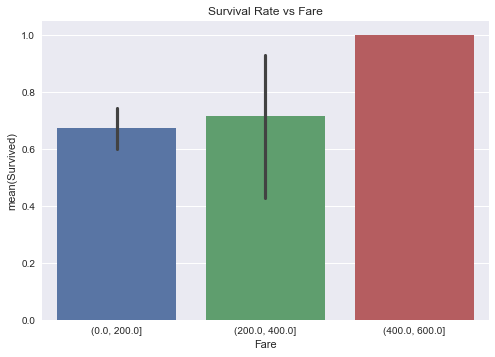

In [12]:
# Use built-in function -cut to quantize the Fare within 4 segments.
quantized_fare = pd.cut(titanic_df['Fare'], np.linspace(0, 600, num=4))
# Seaborn automatically calculate the survived rate of each quantized_fare group
sns.plt.title('Survival Rate vs Fare')
sns.barplot(x=quantized_fare, y="Survived", data=titanic_df)

#### Conclusion

* Factor 1: Embarked
Especially Cherbourg' port looks expensive more than other ports
* Factor 2: Pclass
Apparently Pclass is highly correlated with Fare
* Factor 3: Survival Rate
The survival rate also highly correlated with Fare since it is affected by Pclass


#### Limitation
Since the Titanic Data has a lot of NaN datas, it may cause the untrusted due to lack of samples.